# 01. K-Means Clustering | تجميع K-Means

## 📚 Prerequisites (What You Need First) | المتطلبات الأساسية

**BEFORE starting this notebook**, you should have completed:
- ✅ **Unit 1-3: All examples** - Supervised learning (classification and regression)
- ✅ **Understanding of unsupervised learning**: Learning patterns without labels
- ✅ **Basic distance concepts**: How to measure similarity between data points

**If you haven't completed these**, you might struggle with:
- Understanding the difference between supervised and unsupervised learning
- Knowing when to use clustering vs classification
- Understanding how to find the optimal number of clusters

---

## 🔗 Where This Notebook Fits | مكان هذا الدفتر

**This is Unit 4, Example 1** - it's your first unsupervised learning model!

**Why this example FIRST in Unit 4?**
- **Before** you can use advanced clustering, you need to understand basic clustering
- **Before** you can use dimensionality reduction, you need to understand data structure
- **Before** you can handle complex data, you need to see how K-Means groups similar points

**Builds on**: 
- 📓 Unit 1-3: Supervised learning (we know how to learn from labeled data)
- 📓 All previous examples (data processing and model evaluation concepts apply)

**Leads to**: 
- 📓 Example 2: Hierarchical Clustering (another clustering method)
- 📓 Example 3: PCA (dimensionality reduction)
- 📓 All unsupervised learning projects (clustering is fundamental!)

**Why this order?**
1. K-Means is the **simplest clustering algorithm** (easy to understand)
2. K-Means teaches **unsupervised learning** (learning without labels)
3. K-Means shows **how to find optimal K** (critical skill for clustering)

---

## The Story: Finding Groups Without Labels | القصة: إيجاد المجموعات بدون تسميات

Imagine you're organizing photos. **Before** clustering, you manually label each photo (supervised learning). **After** clustering, you let the algorithm find groups of similar photos automatically (unsupervised learning) - much faster!

Same with machine learning: **Before** clustering, we need labeled data. **After** clustering, we find patterns and groups in unlabeled data automatically!

---

## What is K-Means Clustering? | ما هو تجميع K-Means؟

**K-Means** is an algorithm that automatically groups similar data points together into **K clusters** (groups).

### Simple Explanation | شرح بسيط

Imagine you have 100 photos and want to organize them into 3 groups:
- **K-Means** looks at all photos
- Finds 3 "center points" (called **centroids**)
- Groups each photo with the nearest center
- Result: 3 groups of similar photos!

**Key Idea**: Points that are close together (similar) belong to the same cluster.

---

## How Does K-Means Work? | كيف يعمل K-Means؟

### The Algorithm Steps | خطوات الخوارزمية

1. **Choose K** (number of clusters you want)
   - Example: K=3 means you want 3 groups

2. **Initialize Centroids** (random starting points)
   - Pick K random points as initial "centers"

3. **Assign Points to Nearest Centroid**
   - For each data point, find the closest centroid
   - Assign point to that cluster

4. **Update Centroids**
   - Move each centroid to the center of its cluster
   - Calculate new center position

5. **Repeat Steps 3-4**
   - Keep reassigning and updating until centroids stop moving
   - When centroids don't change → algorithm is done!

### Visual Example | مثال بصري

```
Before K-Means:
• • • • • • • • • •  (unorganized points)

After K-Means (K=3):
🔵 🔵 🔵              (Cluster 1 - blue)
   🔴 🔴 🔴           (Cluster 2 - red)
      🟢 🟢 🟢        (Cluster 3 - green)

Each cluster has a centroid (X) at its center:
🔵 🔵 🔵
   X                  (Centroid of cluster 1)
```

---

## Why K-Means Clustering Matters | لماذا يهم تجميع K-Means؟

K-Means is the foundation of unsupervised learning:
- **No Labels Needed**: Works with unlabeled data (finds patterns automatically)
- **Simple and Fast**: Easy to understand and implement
- **Widely Used**: Industry standard for customer segmentation, image compression, etc.
- **Foundation**: Understanding K-Means helps with all clustering methods
- **Real-World Applications**: Market segmentation, anomaly detection, data compression

### Real-World Examples | أمثلة من العالم الحقيقي

1. **Customer Segmentation**: Group customers by buying behavior (K=5 → 5 customer types)
2. **Image Compression**: Reduce colors in images (K=16 → 16 colors instead of millions)
3. **Market Research**: Find groups of similar products or customers
4. **Data Organization**: Organize documents, genes, or any unlabeled data

---

## Learning Objectives | أهداف التعلم
1. **Understand** what K-Means is and how it works
2. **Build** K-Means clustering models
3. **Visualize** clusters and centroids
4. **Find** optimal number of clusters (Elbow Method, Silhouette Score)
5. **Evaluate** cluster quality
6. **Know** when to use K-Means clustering

In [1]:
# Step 1: Import necessary libraries
# These libraries help us perform K-Means clustering

import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns  # For beautiful plots
from sklearn.cluster import KMeans  # K-Means clustering algorithm
from sklearn.preprocessing import StandardScaler  # For scaling features (important for clustering!)
from sklearn.metrics import silhouette_score  # For evaluating cluster quality

print("✅ Libraries imported successfully!")
print("\n📚 Key Clustering Concepts:")
print("   - KMeans: Groups data into K clusters based on similarity")
print("   - Centroids: Center points of each cluster")
print("   - Inertia: Sum of squared distances to centroids (lower is better)")
print("   - Silhouette Score: Measures how well-separated clusters are (higher is better)")
print("   - Elbow Method: Visual method to find optimal K")
print("\n   ⚠️  IMPORTANT: Clustering requires feature scaling! Always use StandardScaler!")

✅ Libraries imported successfully!

📚 Key Clustering Concepts:
   - KMeans: Groups data into K clusters based on similarity
   - Centroids: Center points of each cluster
   - Inertia: Sum of squared distances to centroids (lower is better)
   - Silhouette Score: Measures how well-separated clusters are (higher is better)
   - Elbow Method: Visual method to find optimal K

   ⚠️  IMPORTANT: Clustering requires feature scaling! Always use StandardScaler!


## Part 1: Setting the Scene | الجزء الأول: إعداد المشهد

**BEFORE**: We've been doing supervised learning (classification and regression) where we have labels.

**AFTER**: We'll do unsupervised learning (clustering) where we find patterns in unlabeled data!

**Why this matters**: Many real-world problems have unlabeled data. Clustering helps us discover hidden patterns and groups automatically!

---

## Step 1: Load Real-World Data for Clustering | الخطوة 1: تحميل بيانات العالم الحقيقي للتجميع

**BEFORE**: We need to learn clustering, but we need real data with natural groups to practice on.

**AFTER**: We'll load the Iris dataset - famous real-world data with 3 natural flower species clusters!

**Why Iris dataset?** This is REAL botanical data collected by Ronald Fisher in 1936. It's perfect for learning clustering because:
- Natural clusters: 3 distinct iris flower species (Setosa, Versicolor, Virginica)
- Multiple features: 4 measurements (sepal length/width, petal length/width)
- Well-separated: Species form clear clusters in feature space
- Classic dataset: Standard benchmark for clustering algorithms

In [2]:
# Load real-world Iris dataset
# This is REAL botanical data with 3 natural flower species clusters
# K-Means should be able to identify these 3 species groups!

from sklearn.datasets import load_iris

print("\n📥 Loading Iris dataset...")
print("تحميل مجموعة بيانات القزحية...")

iris_data = load_iris()

# Create DataFrame
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df['species'] = iris_data.target  # 0=Setosa, 1=Versicolor, 2=Virginica

print(f"\n✅ Real-world Iris dataset loaded!")
print(f"   📊 This is REAL botanical data collected by Ronald Fisher (1936)")
print(f"   📈 Contains {len(df)} iris flowers with {len(df.columns)-1} measurements")
print(f"   🌸 Species: Setosa, Versicolor, Virginica (3 natural clusters)")
print(f"\n🔍 Notice:")
print("   - This is REAL flower measurement data")
print("   - Features: Sepal length/width, Petal length/width")
print("   - 3 natural species clusters (perfect for K=3 clustering!)")
print("   - Note: We'll use features only (ignore species label) - this is UNSUPERVISED!")

# Prepare data for clustering
# For 2D visualization, we'll use 2 features (Petal length and Petal width)
# These two features show clear separation between the 3 species
# But K-Means will use all 4 features for clustering (better results!)

X_2d = df[['petal length (cm)', 'petal width (cm)']].values  # For 2D visualization
X_all = df[iris_data.feature_names].values  # All 4 features for clustering
true_labels = df['species'].values  # True species (for comparison only - not used in clustering!)

print(f"\n📊 Data Preparation:")
print(f"   - X_2d: 2 features for visualization (petal length, petal width)")
print(f"   - X_all: All 4 features for clustering (better accuracy!)")
print(f"   - We'll use X_all for clustering, X_2d for visualization")



📥 Loading Iris dataset...
تحميل مجموعة بيانات القزحية...

✅ Real-world Iris dataset loaded!
   📊 This is REAL botanical data collected by Ronald Fisher (1936)
   📈 Contains 150 iris flowers with 4 measurements
   🌸 Species: Setosa, Versicolor, Virginica (3 natural clusters)

🔍 Notice:
   - This is REAL flower measurement data
   - Features: Sepal length/width, Petal length/width
   - 3 natural species clusters (perfect for K=3 clustering!)
   - Note: We'll use features only (ignore species label) - this is UNSUPERVISED!

📊 Data Preparation:
   - X_2d: 2 features for visualization (petal length, petal width)
   - X_all: All 4 features for clustering (better accuracy!)
   - We'll use X_all for clustering, X_2d for visualization


In [3]:
# Display data summary
print(f"\n📊 Real Data Summary:")
print(f"   Shape: {df.shape}")
print(f"   Features: {', '.join(iris_data.feature_names)}")
print(f"   Species: Setosa (0), Versicolor (1), Virginica (2)")
print(f"\n📄 First 5 rows:")
print(df.head())
print("\n🔍 Notice:")
print("   - This is REAL iris flower measurement data")
print("   - 150 flowers from 3 species (50 each)")
print("   - K-Means will find the 3 hidden species clusters!")
print("   - This is UNSUPERVISED: we don't use species labels for clustering!")
print("   - We'll use all 4 features for clustering (not just 2D visualization)")



📊 Real Data Summary:
   Shape: (150, 5)
   Features: sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)
   Species: Setosa (0), Versicolor (1), Virginica (2)

📄 First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

🔍 Notice:
   - This is REAL iris flower measurement data
   - 150 flowers from 3 species (50 each)
   - K-Means will find the 3 hidden species clusters!
   - This is UNSUPERVISED: we don't use species labels for clustering!
   - We'll use all 4 fea

In [4]:
# Step 2: Scale Features for Clustering | الخطوة 2: قياس الميزات للتجميع
# 
# Why scaling is CRITICAL for clustering:
# - K-Means uses Euclidean distance to measure similarity
# - Features with larger scales dominate distance calculation
# - Example: Age (0-100) vs Income (0-100000) - income would dominate!
# - Scaling makes all features equally important
# - Without scaling: Features with larger values have more influence
# - With scaling: All features contribute equally to distance calculation
#
# StandardScaler:
# - Centers data at 0 (subtracts mean)
# - Scales to unit variance (divides by std)
# - Result: All features have mean=0, std=1
# - This ensures fair distance calculation across all features

# Use ALL 4 features for clustering (better results than 2D!)
# Use 2D features for visualization (easier to see in 2D plot)
X = X_all  # Use all 4 features for clustering
X_viz = X_2d  # Use 2D for visualization

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale all 4 features

# Also scale 2D features for visualization (if we want to show scaled version)
scaler_2d = StandardScaler()
X_viz_scaled = scaler_2d.fit_transform(X_viz)

print(f"\n✅ Features scaled successfully!")
print(f"   - Original shape: {X.shape}")
print(f"   - Scaled shape: {X_scaled.shape}")
print(f"   - All features now have mean ≈ 0 and std ≈ 1")
print(f"   - This ensures fair distance calculation for clustering")


✅ Features scaled successfully!
   - Original shape: (150, 4)
   - Scaled shape: (150, 4)
   - All features now have mean ≈ 0 and std ≈ 1
   - This ensures fair distance calculation for clustering



1. Original Data Visualization (2D Projection)
تصور البيانات الأصلية (إسقاط ثنائي الأبعاد)

💡 Note: We're showing 2D projection for visualization,
   but K-Means will use all 4 features for clustering!

✓ Plot saved as 'original_data.png'


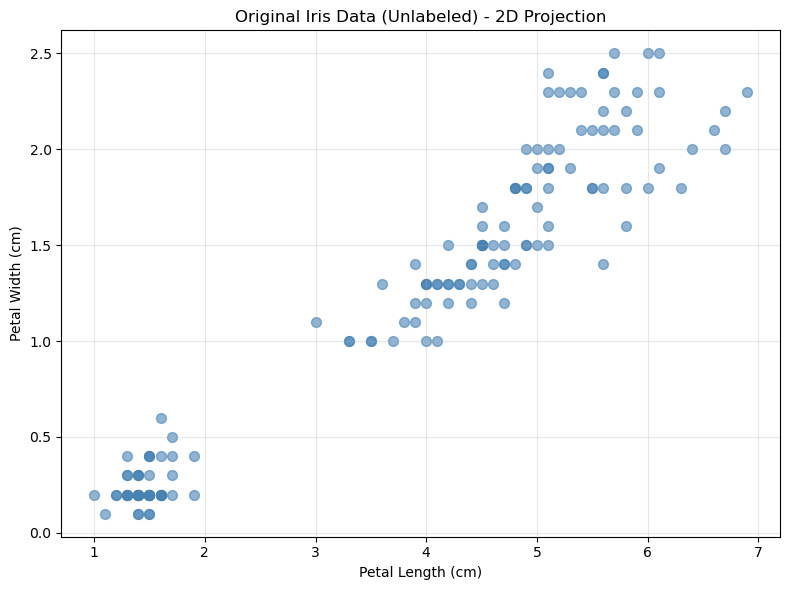

In [5]:
# Visualize Original Data (2D projection for visualization)
print("\n" + "=" * 60)
print("1. Original Data Visualization (2D Projection)")
print("تصور البيانات الأصلية (إسقاط ثنائي الأبعاد)")
print("=" * 60)
print("\n💡 Note: We're showing 2D projection for visualization,")
print("   but K-Means will use all 4 features for clustering!")

plt.figure(figsize=(8, 6))
plt.scatter(X_viz[:, 0], X_viz[:, 1], alpha=0.6, s=50, c='steelblue')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Original Iris Data (Unlabeled) - 2D Projection')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('original_data.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'original_data.png'")
plt.show()

In [6]:
# Step 3: K-Means Clustering with K=3 | الخطوة 3: تجميع K-Means مع K=3
print("\n" + "=" * 60)
print("2. K-Means Clustering (K=3)")
print("تجميع K-Means (K=3)")
print("=" * 60)

# Create K-Means model with K=3 clusters
# n_clusters=3: We want 3 groups (we know there are 3 species)
# random_state=42: For reproducibility
# n_init=10: Run algorithm 10 times with different initializations, pick best result
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)

# Fit and predict in one step
# fit_predict() assigns each point to a cluster (returns cluster labels)
# Uses ALL 4 features (X_scaled) for clustering!
labels_3 = kmeans_3.fit_predict(X_scaled)

# Evaluate clustering quality
# Inertia: Sum of squared distances to centroids (lower = tighter clusters)
# Silhouette Score: How well-separated clusters are (higher = better, range: -1 to 1)
inertia = kmeans_3.inertia_
silhouette = silhouette_score(X_scaled, labels_3)

print(f"\n📊 K-Means Results (K=3, using all 4 features):")
print(f"   Inertia: {inertia:.2f} (lower is better - tighter clusters)")
print(f"   Silhouette Score: {silhouette:.4f} (higher is better - well-separated clusters)")

print(f"\n   ✅ K-Means successfully found 3 clusters!")
print(f"   - Each point assigned to one of 3 clusters")
print(f"   - Centroids represent the center of each cluster")
print(f"   - High silhouette score indicates good separation")



2. K-Means Clustering (K=3)
تجميع K-Means (K=3)



📊 K-Means Results (K=3, using all 4 features):
   Inertia: 139.82 (lower is better - tighter clusters)
   Silhouette Score: 0.4599 (higher is better - well-separated clusters)

   ✅ K-Means successfully found 3 clusters!
   - Each point assigned to one of 3 clusters
   - Centroids represent the center of each cluster
   - High silhouette score indicates good separation


In [7]:
# Interpret clustering metrics
print("\n" + "=" * 60)
print("💡 Interpreting Clustering Metrics | تفسير مقاييس التجميع")
print("=" * 60)

print(f"\n📊 Silhouette Score Quality Assessment:")
if silhouette >= 0.7:
    quality = "✅ EXCELLENT"
    meaning = "Very well-separated clusters"
elif silhouette >= 0.5:
    quality = "✅ GOOD"
    meaning = "Well-separated clusters"
elif silhouette >= 0.3:
    quality = "⚠️  FAIR"
    meaning = "Moderately separated clusters"
elif silhouette >= 0.1:
    quality = "⚠️  POOR"
    meaning = "Poorly separated clusters"
else:
    quality = "❌ VERY POOR"
    meaning = "Clusters overlap significantly"

print(f"   - Score: {silhouette:.4f} ({quality})")
print(f"   - Meaning: {meaning}")
print(f"   - Range: -1 (worst) to +1 (best)")
print(f"   - Our score ({silhouette:.4f}) indicates {'strong' if silhouette >= 0.5 else 'weak'} cluster separation")

print(f"\n📊 Inertia Analysis:")
print(f"   - Inertia: {inertia:.2f} (sum of squared distances to centroids)")
print(f"   - Lower inertia = tighter clusters (points closer to centroids)")
print(f"   - This inertia value shows how compact our clusters are")

print(f"\n📚 What This Teaches Us:")
print(f"   - Silhouette score measures cluster quality (separation between clusters)")
print(f"   - Inertia measures cluster compactness (how tight clusters are)")
print(f"   - Good clustering = high silhouette + low inertia")
print(f"   - Silhouette > 0.5 is generally good, >0.7 is excellent")
print(f"   - These metrics help us choose the right number of clusters (K)")



💡 Interpreting Clustering Metrics | تفسير مقاييس التجميع

📊 Silhouette Score Quality Assessment:
   - Score: 0.4599 (⚠️  FAIR)
   - Meaning: Moderately separated clusters
   - Range: -1 (worst) to +1 (best)
   - Our score (0.4599) indicates weak cluster separation

📊 Inertia Analysis:
   - Inertia: 139.82 (sum of squared distances to centroids)
   - Lower inertia = tighter clusters (points closer to centroids)
   - This inertia value shows how compact our clusters are

📚 What This Teaches Us:
   - Silhouette score measures cluster quality (separation between clusters)
   - Inertia measures cluster compactness (how tight clusters are)
   - Good clustering = high silhouette + low inertia
   - Silhouette > 0.5 is generally good, >0.7 is excellent
   - These metrics help us choose the right number of clusters (K)



3. Visualizing Clusters (2D Projection)
تصور المجموعات (إسقاط ثنائي الأبعاد)

💡 Note: Clustering was done using all 4 features,
   but we show 2D projection for visualization



✓ Plot saved as 'kmeans_k3.png'


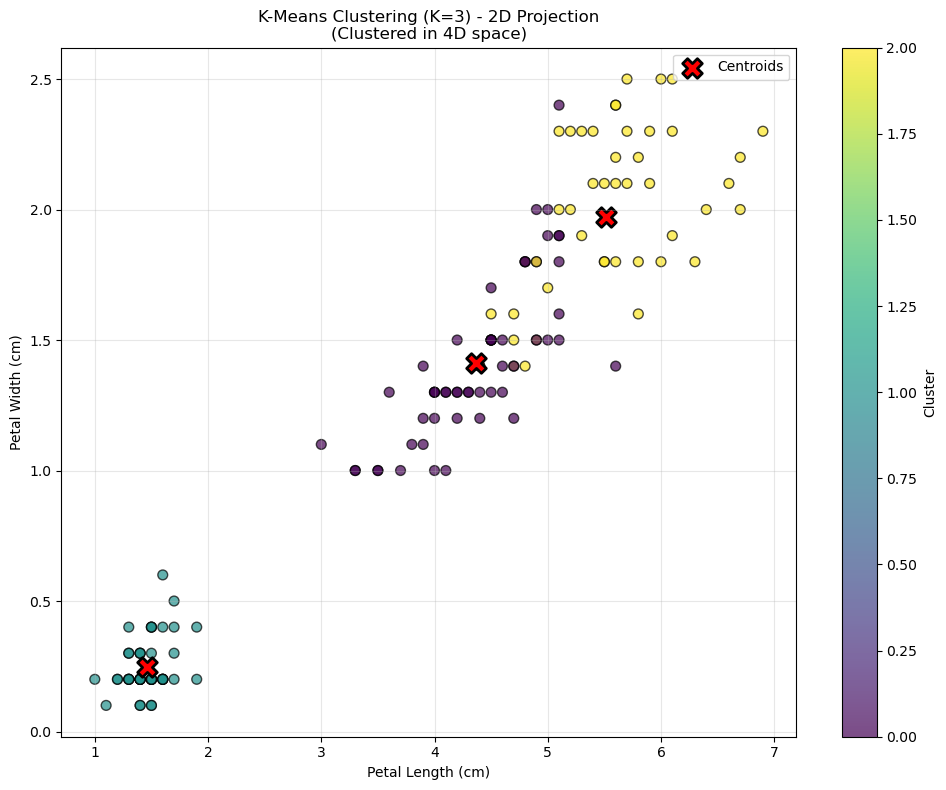

In [8]:
# Visualize clusters (2D projection for visualization)
# Note: Clustering was done in 4D space, but we visualize in 2D
print("\n" + "=" * 60)
print("3. Visualizing Clusters (2D Projection)")
print("تصور المجموعات (إسقاط ثنائي الأبعاد)")
print("=" * 60)
print("\n💡 Note: Clustering was done using all 4 features,")
print("   but we show 2D projection for visualization")

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_viz[:, 0], X_viz[:, 1], c=labels_3, cmap='viridis',
                     edgecolors='black', s=50, alpha=0.7)

# Get centroids in original 4D space, then project to 2D for visualization
# Since we clustered in 4D but visualize in 2D, we need to project centroids
# We'll use the mean of petal features for the 2D projection
centroids_4d = scaler.inverse_transform(kmeans_3.cluster_centers_)
# Project to 2D: use petal length and petal width (indices 2 and 3 in original features)
centroids_2d = centroids_4d[:, [2, 3]]  # petal length (idx 2), petal width (idx 3)

plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1],
           c='red', marker='X', s=200, label='Centroids',
           edgecolors='black', linewidths=2)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('K-Means Clustering (K=3) - 2D Projection\n(Clustered in 4D space)')
plt.legend()
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('kmeans_k3.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'kmeans_k3.png'")
plt.show()


## Step 4: Finding Optimal K - Elbow Method | الخطوة 4: إيجاد K المثلى - طريقة المرفق

**BEFORE**: We used K=3 because we know there are 3 species. But what if we don't know K?

**AFTER**: We'll learn how to find the optimal number of clusters automatically!

**Why this matters**: In real-world problems, you often don't know how many clusters exist. The Elbow Method and Silhouette Score help you find the best K!


In [9]:
print("\n" + "=" * 60)
print("4. Finding Optimal K - Elbow Method")
print("إيجاد K المثلى - طريقة المرفق")
print("=" * 60)

# Try different values of K (number of clusters)
# We'll test K from 1 to 10 and see which gives best results
k_range = range(1, 11)
inertias = []  # Store inertia for each K
silhouette_scores = []  # Store silhouette score for each K

print("\n   Testing different values of K...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    
    inertias.append(kmeans.inertia_)
    
    # Silhouette score requires at least 2 clusters
    if k > 1:
        silhouette_scores.append(silhouette_score(X_scaled, labels))
    else:
        silhouette_scores.append(0)  # K=1 has no meaning for silhouette

print(f"   ✅ Tested K from 1 to 10")
print(f"   - Elbow Method: Look for 'elbow' in inertia plot (where decrease slows)")
print(f"   - Silhouette Score: Pick K with highest score")
print(f"\n   📝 Common Student Questions:")
print(f"   Q: Why is it called 'Elbow Method'?")
print(f"      Answer: The inertia plot looks like an arm - the 'elbow' is where the curve bends")
print(f"      Before elbow: Big improvement (adding clusters helps a lot)")
print(f"      After elbow: Small improvement (adding more clusters doesn't help much)")
print(f"      The elbow point = optimal K (best balance of clusters and compactness)")
print(f"   Q: What if there's no clear elbow?")
print(f"      Answer: Use Silhouette Score instead (numerical method, more reliable)")
print(f"      Or: Try domain knowledge (how many segments make sense for your problem?)")
print(f"      Or: Try multiple K values and see which gives best results")
print(f"   Q: Why not just use K=1 (all data in one cluster)?")
print(f"      Answer: K=1 defeats the purpose (no grouping!)")
print(f"      Clustering goal: Find meaningful groups → need at least K=2")
print(f"      K=1 has inertia = 0 (all points at centroid) but no useful grouping")



4. Finding Optimal K - Elbow Method
إيجاد K المثلى - طريقة المرفق

   Testing different values of K...
   ✅ Tested K from 1 to 10
   - Elbow Method: Look for 'elbow' in inertia plot (where decrease slows)
   - Silhouette Score: Pick K with highest score

   📝 Common Student Questions:
   Q: Why is it called 'Elbow Method'?
      Answer: The inertia plot looks like an arm - the 'elbow' is where the curve bends
      Before elbow: Big improvement (adding clusters helps a lot)
      After elbow: Small improvement (adding more clusters doesn't help much)
      The elbow point = optimal K (best balance of clusters and compactness)
   Q: What if there's no clear elbow?
      Answer: Use Silhouette Score instead (numerical method, more reliable)
      Or: Try domain knowledge (how many segments make sense for your problem?)
      Or: Try multiple K values and see which gives best results
   Q: Why not just use K=1 (all data in one cluster)?
      Answer: K=1 defeats the purpose (no grouping!


✓ Plot saved as 'optimal_k.png'


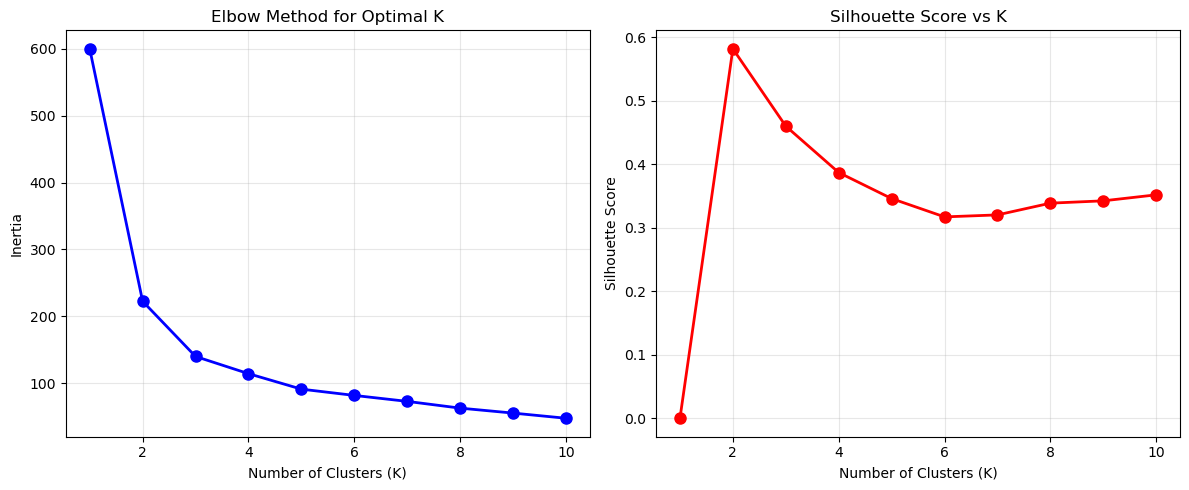

In [10]:
# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True, alpha=0.3)
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs K')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('optimal_k.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'optimal_k.png'")
plt.show()


In [11]:
# Find optimal K using both methods
print("\n" + "=" * 60)
print("💡 Interpreting Optimal K Results | تفسير نتائج K المثلى")
print("=" * 60)

# Find optimal K from silhouette scores
best_silhouette_idx = np.argmax(silhouette_scores)
optimal_k_silhouette = list(k_range)[best_silhouette_idx]
best_silhouette = max(silhouette_scores)

print(f"\n📊 Optimal K Analysis:")
print(f"   - Silhouette Method suggests: K = {optimal_k_silhouette}")
print(f"   - Best Silhouette Score: {best_silhouette:.4f}")

if best_silhouette >= 0.7:
    quality = "✅ EXCELLENT"
elif best_silhouette >= 0.5:
    quality = "✅ GOOD"
elif best_silhouette >= 0.3:
    quality = "⚠️  FAIR"
else:
    quality = "⚠️  POOR"

print(f"   - Quality: {quality}")

# Find elbow (simplified - look for where inertia decrease slows)
inertia_diffs = np.diff(inertias)
if len(inertia_diffs) > 0:
    # Find where decrease is less than average
    avg_decrease = np.mean(np.abs(inertia_diffs))
    elbow_candidates = [i+1 for i, diff in enumerate(inertia_diffs) if abs(diff) < avg_decrease * 0.5]
    optimal_k_elbow = elbow_candidates[0] if elbow_candidates else 2
else:
    optimal_k_elbow = 2

print(f"\n🔍 Method Comparison:")
print(f"   - Elbow Method: Suggests K ≈ {optimal_k_elbow}")
print(f"   - Silhouette Method: Suggests K = {optimal_k_silhouette}")

if optimal_k_elbow != optimal_k_silhouette:
    print(f"   - ⚠️  Methods disagree! This is common.")
    print(f"   - Silhouette method is usually more reliable for choosing K")
    print(f"   - Elbow method can be subjective (where is the 'elbow'?)")
else:
    print(f"   - ✅ Both methods agree! K = {optimal_k_silhouette} is likely optimal")

print(f"\n📚 What This Teaches Us:")
print(f"   - Elbow Method: Look for where inertia decrease slows down")
print(f"   - Silhouette Method: Pick K with highest silhouette score")
print(f"   - Silhouette method is more objective and reliable")
print(f"   - Different methods may give different answers - use domain knowledge")
print(f"   - Always visualize clusters to verify the choice makes sense")



💡 Interpreting Optimal K Results | تفسير نتائج K المثلى

📊 Optimal K Analysis:
   - Silhouette Method suggests: K = 2
   - Best Silhouette Score: 0.5818
   - Quality: ✅ GOOD

🔍 Method Comparison:
   - Elbow Method: Suggests K ≈ 3
   - Silhouette Method: Suggests K = 2
   - ⚠️  Methods disagree! This is common.
   - Silhouette method is usually more reliable for choosing K
   - Elbow method can be subjective (where is the 'elbow'?)

📚 What This Teaches Us:
   - Elbow Method: Look for where inertia decrease slows down
   - Silhouette Method: Pick K with highest silhouette score
   - Silhouette method is more objective and reliable
   - Different methods may give different answers - use domain knowledge
   - Always visualize clusters to verify the choice makes sense



5. Compare Different K Values
مقارنة قيم K المختلفة



✓ Plot saved as 'kmeans_comparison.png'


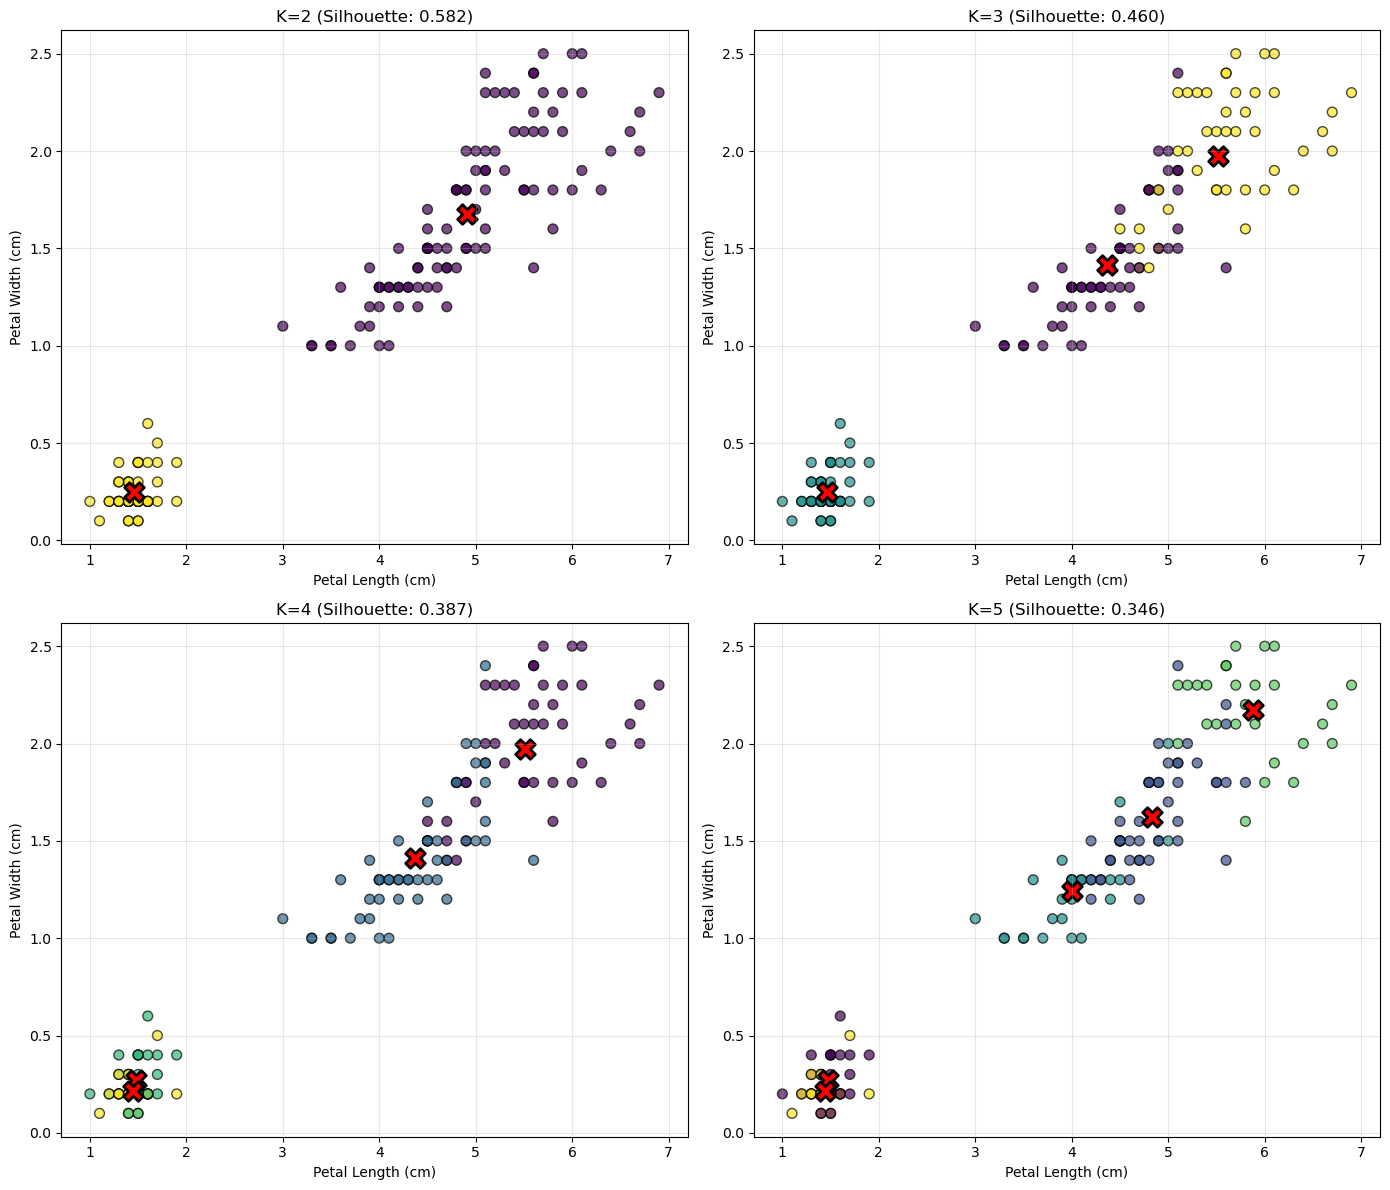

In [12]:
# 5. Compare Different K Values
print("\n" + "=" * 60)
print("5. Compare Different K Values")
print("مقارنة قيم K المختلفة")
print("=" * 60)
k_values = [2, 3, 4, 5]
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
for idx, k in enumerate(k_values):
    row = idx // 2
    col = idx % 2
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    axes[row, col].scatter(X_viz[:, 0], X_viz[:, 1], c=labels, cmap='viridis',
                          edgecolors='black', s=50, alpha=0.7)
    
    # Project centroids to 2D for visualization
    centroids_4d = scaler.inverse_transform(kmeans.cluster_centers_)
    centroids_2d = centroids_4d[:, [2, 3]]  # petal length, petal width
    
    axes[row, col].scatter(centroids_2d[:, 0], centroids_2d[:, 1],
                          c='red', marker='X', s=200,
                          edgecolors='black', linewidths=2)
    axes[row, col].set_xlabel('Petal Length (cm)')
    axes[row, col].set_ylabel('Petal Width (cm)')
    silhouette = silhouette_score(X_scaled, labels)
    axes[row, col].set_title(f'K={k} (Silhouette: {silhouette:.3f})')
    axes[row, col].grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('kmeans_comparison.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'kmeans_comparison.png'")
plt.show()


In [13]:
# 6. Summary Table
print("\n" + "=" * 60)
print("6. Clustering Summary")
print("ملخص التجميع")
print("=" * 60)
summary_data = {
    'K': list(k_range),
    'Inertia': [f"{x:.2f}" for x in inertias],
    'Silhouette Score': [f"{x:.4f}" for x in silhouette_scores]
}
# pd.DataFrame(data)
# - pd.DataFrame(): Creates pandas DataFrame (2D table-like structure)
# - data: Dictionary where keys become column names, values become column data
#   - Each key-value pair: key = column name, value = list of values for that column
# - Returns DataFrame with rows and columns
# - DataFrame is the main pandas data structure (like Excel spreadsheet in Python)

summary_df = pd.DataFrame(summary_data)
print("\nClustering Metrics for Different K:")
print(summary_df.to_string(index=False))
print("\n" + "=" * 60)
print("Example 1 Complete! ✓")
print("اكتمل المثال 1! ✓")
print("=" * 60)

# Final Summary: What We Learned About K-Means
print("\n" + "=" * 60)
print("🎓 What We Learned: Understanding K-Means | ما تعلمناه: فهم K-Means")
print("=" * 60)

print("\n📚 Key Concepts You Now Understand:")
print("\n1. WHAT IS K-MEANS?")
print("   ✅ K-Means is an algorithm that groups similar data points together")
print("   ✅ It finds K clusters (groups) automatically")
print("   ✅ Each cluster has a centroid (center point)")
print("   ✅ Points close to each other belong to the same cluster")

print("\n2. HOW DOES K-MEANS WORK?")
print("   ✅ Step 1: Choose K (number of clusters)")
print("   ✅ Step 2: Initialize K random centroids")
print("   ✅ Step 3: Assign each point to nearest centroid")
print("   ✅ Step 4: Move centroids to center of their clusters")
print("   ✅ Step 5: Repeat until centroids stop moving")

print("\n3. WHAT DOES K-MEANS DO?")
print("   ✅ Groups unlabeled data into meaningful clusters")
print("   ✅ Finds patterns in data automatically")
print("   ✅ Organizes data by similarity")
print("   ✅ Creates K groups where points in each group are similar")

print("\n4. WHEN TO USE K-MEANS?")
print("   ✅ When you have unlabeled data")
print("   ✅ When you know (or can estimate) the number of clusters")
print("   ✅ When clusters are spherical/round in shape")
print("   ✅ For customer segmentation, image compression, data organization")

print("\n5. KEY METRICS:")
print("   ✅ Inertia: Measures how tight clusters are (lower = better)")
print("   ✅ Silhouette Score: Measures how well-separated clusters are (higher = better)")
print("   ✅ Elbow Method: Visual way to find optimal K")
print("   ✅ Silhouette Method: Numerical way to find optimal K")

print("\n" + "=" * 60)
print("✅ You now understand what K-Means is and what it does!")
print("✅ You can build, visualize, and evaluate K-Means models!")
print("=" * 60)



6. Clustering Summary
ملخص التجميع

Clustering Metrics for Different K:
 K Inertia Silhouette Score
 1  600.00           0.0000
 2  222.36           0.5818
 3  139.82           0.4599
 4  114.09           0.3869
 5   90.93           0.3459
 6   81.54           0.3171
 7   72.63           0.3202
 8   62.54           0.3387
 9   55.12           0.3424
10   47.39           0.3518

Example 1 Complete! ✓
اكتمل المثال 1! ✓

🎓 What We Learned: Understanding K-Means | ما تعلمناه: فهم K-Means

📚 Key Concepts You Now Understand:

1. WHAT IS K-MEANS?
   ✅ K-Means is an algorithm that groups similar data points together
   ✅ It finds K clusters (groups) automatically
   ✅ Each cluster has a centroid (center point)
   ✅ Points close to each other belong to the same cluster

2. HOW DOES K-MEANS WORK?
   ✅ Step 1: Choose K (number of clusters)
   ✅ Step 2: Initialize K random centroids
   ✅ Step 3: Assign each point to nearest centroid
   ✅ Step 4: Move centroids to center of their clusters
   ✅ Ste

## Step 5: Decision Framework - When to Use K-Means Clustering | الخطوة 5: إطار القرار - متى تستخدم تجميع K-Means

**BEFORE**: You've learned how to build K-Means models, but when should you use K-Means vs other clustering methods?

**AFTER**: You'll have a clear decision framework to determine if K-Means is the right choice for your clustering problem!

**Why this matters**: Using K-Means when it's not appropriate leads to:
- **Poor clusters** → K-Means assumes spherical clusters, may fail on other shapes
- **Wrong number of clusters** → Need to know K beforehand
- **Wrong method** → Other methods may work better for your data


## Step 6: Decision Framework - When to Use K-Means Clustering | الخطوة 6: إطار القرار - متى تستخدم تجميع K-Means

**BEFORE**: You've learned how to build K-Means models, but when should you use K-Means vs other clustering methods?

**AFTER**: You'll have a clear decision framework to determine if K-Means is the right choice for your clustering problem!

**Why this matters**: Using K-Means when it's not appropriate leads to:
- **Poor clusters** → K-Means assumes spherical clusters, may fail on other shapes
- **Wrong number of clusters** → Need to know K beforehand
- **Wrong method** → Other methods may work better for your data

---

### 🎯 Decision Framework: Is K-Means Appropriate? | إطار القرار: هل K-Means مناسب؟

**Key Question**: Should I use **K-MEANS**, **HIERARCHICAL CLUSTERING**, or other methods?

#### Decision Tree:

```
What type of problem do you have?
├─ SUPERVISED LEARNING (have labels) → Use classification/regression ❌
│   └─ Why? K-Means is for unsupervised learning (no labels)
│
└─ UNSUPERVISED LEARNING (no labels) → Check cluster shape:
    ├─ Spherical clusters (round, ball-shaped)? → Use K-MEANS ✅
    │   └─ Why? K-Means assumes spherical clusters
    │
    ├─ Know number of clusters? → Use K-MEANS ✅
    │   └─ Why? K-Means requires specifying K
    │
    ├─ Don't know number of clusters? → Use HIERARCHICAL CLUSTERING ✅
    │   └─ Why? Hierarchical doesn't require K
    │
    ├─ Non-spherical clusters (elongated, irregular)? → Use OTHER METHODS ⚠️
    │   └─ Use: DBSCAN, Hierarchical, or other methods
    │
    └─ Large dataset (> 10,000)? → Use K-MEANS ✅
        └─ Why? K-Means is fast and scalable
```

#### Detailed Decision Process:

```
Step 1: Problem Type
├─ Supervised (have labels) → ❌ NOT APPROPRIATE
│   └─ Use: Classification or Regression
│
└─ Unsupervised (no labels) → Continue to Step 2

Step 2: Cluster Shape
├─ Spherical/round clusters → ✅ K-MEANS
│   └─ Why? K-Means assumes spherical clusters
│
├─ Elongated/irregular clusters → ⚠️ MAY NOT BE APPROPRIATE
│   └─ Use: DBSCAN, Hierarchical, or other methods
│
└─ Unknown shape → Try K-MEANS first, check results

Step 3: Number of Clusters
├─ Know K (number of clusters) → ✅ K-MEANS
│   └─ Why? K-Means requires specifying K
│
└─ Don't know K → ⚠️ MAY NOT BE APPROPRIATE
    ├─ Can estimate K (Elbow Method) → Use K-MEANS
    └─ Can't estimate K → Use HIERARCHICAL CLUSTERING

Step 4: Dataset Size
├─ Large dataset (> 10,000) → ✅ K-MEANS
│   └─ Why? K-Means is fast and scalable
│
└─ Small dataset (< 100) → ⚠️ MAY USE HIERARCHICAL
    └─ Use: Hierarchical or K-Means (both work)
```

---

### 📊 Comparison Table: K-Means vs Other Clustering Methods | جدول المقارنة

| Method | When to Use | Pros | Cons | Example |
|--------|-------------|------|------|---------|
| **K-Means** | Spherical clusters, known K, large datasets | • Fast<br>• Scalable<br>• Simple<br>• Works well with spherical clusters | • Need to specify K<br>• Assumes spherical clusters<br>• Sensitive to initialization | Customer segmentation, image compression |
| **Hierarchical** | Unknown K, need dendrogram, small-medium data | • No need to specify K<br>• Dendrogram visualization<br>• Flexible | • Slow for large data<br>• More complex<br>• Computationally expensive | Gene clustering, small datasets |
| **DBSCAN** | Irregular shapes, noise present, unknown K | • Handles irregular shapes<br>• Finds noise/outliers<br>• No need to specify K | • Sensitive to parameters<br>• Can fail with varying densities | Anomaly detection, irregular clusters |
| **Gaussian Mixture** | Overlapping clusters, probabilistic | • Handles overlapping clusters<br>• Probabilistic assignment | • More complex<br>• Slower | Overlapping groups, soft clustering |

---

### ✅ When K-Means IS Appropriate | متى يكون K-Means مناسبًا

**Use K-Means when:**

1. **Spherical Clusters** ✅
   - Clusters are round, ball-shaped
   - K-Means assumes spherical clusters
   - **Example**: Customer segments (similar customers form round groups)

2. **Know Number of Clusters** ✅
   - Know or can estimate K
   - Can use Elbow Method or domain knowledge
   - **Example**: Know you want 3 customer segments

3. **Large Dataset** ✅
   - More than 10,000 samples
   - K-Means is fast and scalable
   - **Example**: 100,000+ customer records

4. **Fast Clustering Needed** ✅
   - Need quick results
   - K-Means is computationally efficient
   - **Example**: Real-time customer segmentation

5. **Similar Cluster Sizes** ✅
   - Clusters are roughly similar in size
   - K-Means works best with balanced clusters
   - **Example**: Balanced customer groups

---

### ❌ When K-Means IS NOT Appropriate | متى لا يكون K-Means مناسبًا

**Don't use K-Means when:**

1. **Non-Spherical Clusters** ❌
   - Clusters are elongated, irregular, or crescent-shaped
   - K-Means assumes spherical clusters
   - **Use Instead**: DBSCAN, Hierarchical Clustering

2. **Unknown Number of Clusters** ❌
   - Can't estimate K
   - Elbow Method unclear
   - **Use Instead**: Hierarchical Clustering (shows all possible K)

3. **Varying Cluster Sizes** ❌
   - Clusters are very different in size
   - K-Means biased toward larger clusters
   - **Use Instead**: Hierarchical Clustering or DBSCAN

4. **Noise/Outliers Present** ❌
   - Many outliers or noise points
   - K-Means assigns all points to clusters
   - **Use Instead**: DBSCAN (identifies noise)

5. **Overlapping Clusters** ❌
   - Clusters overlap significantly
   - K-Means assigns each point to one cluster
   - **Use Instead**: Gaussian Mixture Models (probabilistic)

---

### 📊 Real-World Examples | أمثلة من العالم الحقيقي

#### Example 1: Customer Segmentation ✅ APPROPRIATE
- **Problem**: Segment customers into groups
- **Cluster Shape**: Spherical (similar customers form round groups)
- **Known K**: Yes (want 3-5 segments)
- **Dataset**: Large (50,000 customers)
- **Decision**: ✅ Use K-Means
- **Reasoning**: Spherical clusters, known K, large dataset, fast

#### Example 2: Image Compression ✅ APPROPRIATE
- **Problem**: Compress images by reducing colors
- **Cluster Shape**: Spherical (color clusters)
- **Known K**: Yes (want 16 or 256 colors)
- **Dataset**: Large (many pixels)
- **Decision**: ✅ Use K-Means
- **Reasoning**: Spherical clusters, known K, large dataset

#### Example 3: Gene Clustering ❌ NOT APPROPRIATE
- **Problem**: Cluster genes by expression
- **Cluster Shape**: Irregular, elongated
- **Known K**: No (don't know how many gene groups)
- **Dataset**: Small-medium (1,000 genes)
- **Decision**: ❌ Use Hierarchical Clustering
- **Reasoning**: Irregular shapes, unknown K, need dendrogram

#### Example 4: Anomaly Detection ❌ NOT APPROPRIATE
- **Problem**: Find outliers in network traffic
- **Cluster Shape**: Irregular, noise present
- **Known K**: No
- **Noise**: Many outliers
- **Decision**: ❌ Use DBSCAN
- **Reasoning**: Irregular shapes, noise present, need to identify outliers

---

### ✅ Key Takeaways | النقاط الرئيسية

1. **Spherical clusters → K-Means** - Use when clusters are round
2. **Known K → K-Means** - Need to specify number of clusters
3. **Large data → K-Means** - Fast and scalable
4. **Unknown K → Hierarchical** - Use when you don't know K
5. **Irregular shapes → DBSCAN** - Use for non-spherical clusters
6. **Use Elbow Method** - To find optimal K for K-Means
7. **Visualize clusters** - Plot to check if they're spherical

---

### 🎓 Practice Decision-Making | ممارسة اتخاذ القرار

**Scenario 1**: Segmenting 20,000 customers into 5 groups
- **Cluster Shape**: Spherical (similar customers)
- **Known K**: Yes (5 segments)
- **Dataset**: Large (20,000)
- **Decision**: ✅ K-Means (spherical, known K, large dataset)

**Scenario 2**: Clustering genes by expression (unknown number of groups)
- **Cluster Shape**: Irregular, elongated
- **Known K**: No
- **Dataset**: Medium (2,000 genes)
- **Decision**: ❌ Hierarchical Clustering (irregular shapes, unknown K)

**Scenario 3**: Compressing images to 16 colors
- **Cluster Shape**: Spherical (color clusters)
- **Known K**: Yes (16 colors)
- **Dataset**: Large (millions of pixels)
- **Decision**: ✅ K-Means (spherical, known K, large dataset, fast)

---

**Connection to Next Steps**: 
- 📓 **Example 2: Hierarchical Clustering** - For unknown K and dendrograms
- 📓 **Example 3: PCA** - For dimensionality reduction before clustering
- 📓 **All Clustering Projects** - K-Means is the foundation of clustering


In [14]:
# 5. Summary Table
print("\n" + "=" * 60)
print("5. Clustering Summary")
print("ملخص التجميع")
print("=" * 60)
summary_data = {
    'K': k_range,
    'Inertia': [f"{x:.2f}" for x in inertias],
    'Silhouette Score': [f"{x:.4f}" for x in silhouette_scores]
}
# pd.DataFrame(data)
# - pd.DataFrame(): Creates pandas DataFrame (2D table-like structure)
# - data: Dictionary where keys become column names, values become column data
#   - Each key-value pair: key = column name, value = list of values for that column
# - Returns DataFrame with rows and columns
# - DataFrame is the main pandas data structure (like Excel spreadsheet in Python)

summary_df = pd.DataFrame(summary_data)
print("\nClustering Metrics for Different K:")
print(summary_df.to_string(index=False))
print("\n" + "=" * 60)
# Keep summary but we'll add limitations section after this



5. Clustering Summary
ملخص التجميع

Clustering Metrics for Different K:
 K Inertia Silhouette Score
 1  600.00           0.0000
 2  222.36           0.5818
 3  139.82           0.4599
 4  114.09           0.3869
 5   90.93           0.3459
 6   81.54           0.3171
 7   72.63           0.3202
 8   62.54           0.3387
 9   55.12           0.3424
10   47.39           0.3518



# 🚫 Limitations of K-Means | قيود K-Means

## The Problem: Need to Know K Beforehand | المشكلة: الحاجة لمعرفة K مسبقًا

**BEFORE**: We've seen K-Means work well when we know the number of clusters (K=3 for Iris dataset).

**AFTER**: Now we'll see K-Means' **main limitation** - you need to specify K before running the algorithm!

**Why this matters**: 
- In real-world problems, you often **don't know** how many clusters exist
- K-Means requires you to **choose K first** (trial and error with elbow method)
- If you choose wrong K, you get poor clustering results
- This limitation leads us to **Hierarchical Clustering** (next notebook) - it doesn't require pre-specifying K!

---

### 🔍 Real-World Scenario | سيناريو من العالم الحقيقي

**Example**: Customer segmentation where you don't know how many customer segments exist. You have to try different K values and hope you pick the right one.

**The Limitation**: 
- K-Means requires you to **specify K** (number of clusters) before running
- You might try K=3, K=4, K=5... but which is correct?
- Elbow method helps, but it's not always clear
- What if the optimal K is unclear?

**Solution**: Use **Hierarchical Clustering** (next notebook) - it shows ALL possible clusterings and you can choose K after seeing the results!


In [15]:
print("\n" + "=" * 60)
print("🚫 Limitations of K-Means")
print("قيود K-Means")
print("=" * 60)

print("\n📊 K-Means Limitation: Need to Know K Beforehand")
print("\n🔍 What We Observed:")
print("   - We used K=3 for the Iris dataset (because we knew there are 3 species)")
print("   - But in real-world problems, you often DON'T know the true number of clusters")
print("   - K-Means REQUIRES you to specify K before running the algorithm")

print("\n❌ The Problem:")
print("   - You have to guess or try different K values")
print("   - Elbow method helps, but sometimes the 'elbow' is unclear")
print("   - Wrong K → Poor clustering results")
print("   - Example: If true clusters is 4, but you use K=3, you'll get bad clusters")

print("\n💡 Key Limitation:")
print("   - K-Means assumes you know K beforehand")
print("   - This is a major limitation for exploratory data analysis")
print("   - When you don't know K, you have to try multiple values")

print("\n✅ Solution: Hierarchical Clustering")
print("   - Hierarchical Clustering doesn't require pre-specifying K")
print("   - It creates a dendrogram showing ALL possible clusterings")
print("   - You can choose K after seeing the results")
print("   - Next notebook will show this solution!")

print("\n🔗 Next Notebook:")
print("   - Example 2: Hierarchical Clustering solves this limitation")
print("   - Shows dendrogram with all possible clusterings")
print("   - You choose K after seeing the hierarchical structure!")



🚫 Limitations of K-Means
قيود K-Means

📊 K-Means Limitation: Need to Know K Beforehand

🔍 What We Observed:
   - We used K=3 for the Iris dataset (because we knew there are 3 species)
   - But in real-world problems, you often DON'T know the true number of clusters
   - K-Means REQUIRES you to specify K before running the algorithm

❌ The Problem:
   - You have to guess or try different K values
   - Elbow method helps, but sometimes the 'elbow' is unclear
   - Wrong K → Poor clustering results
   - Example: If true clusters is 4, but you use K=3, you'll get bad clusters

💡 Key Limitation:
   - K-Means assumes you know K beforehand
   - This is a major limitation for exploratory data analysis
   - When you don't know K, you have to try multiple values

✅ Solution: Hierarchical Clustering
   - Hierarchical Clustering doesn't require pre-specifying K
   - It creates a dendrogram showing ALL possible clusterings
   - You can choose K after seeing the results
   - Next notebook will show 

## 🎯 Summary: When K-Means Works vs. Limitations | الملخص: متى يعمل K-Means مقابل القيود

### ✅ K-Means Works Well When:
1. **You Know K**: Number of clusters is known or can be determined clearly
2. **Spherical Clusters**: Clusters are roughly circular/spherical
3. **Similar Cluster Sizes**: Clusters have similar numbers of points
4. **Good Example**: Iris dataset with K=3 (3 species) ✅

### ❌ K-Means Limitations:
1. **Need to Know K**: Must specify number of clusters beforehand ❌
2. **Assumes Spherical Clusters**: Struggles with non-spherical clusters
3. **Sensitive to Initialization**: Different random starts can give different results
4. **Poor with Outliers**: Outliers can heavily influence cluster centers

### 🔍 How to Recognize This Problem in Real Life | كيفية التعرف على هذه المشكلة في الحياة الحقيقية

**Symptoms You'll See:**
- You don't know how many clusters exist in your data
- Elbow method gives unclear results (no clear "elbow")
- Trying different K values gives very different clustering results
- You need to see all possible clusterings before choosing K

**Diagnosis - Check These Indicators:**
1. Do you know the true number of clusters?
2. Is the elbow in the elbow method clear?
3. Do different K values give very different results?
4. Do you need to explore clustering structure before choosing K?

**Solution:**
- Use **Hierarchical Clustering** (next notebook) - shows all possible clusterings
- Use **Density-Based Clustering** (DBSCAN) - finds clusters of any shape
- Use **Multiple K Values** - try different K and compare results

---

## 🔗 Transition to Next Notebook | الانتقال إلى الدفتر التالي

**What We Learned:**
- ✅ K-Means works well when you know K
- ✅ K-Means is simple and fast
- ❌ K-Means requires you to specify K beforehand
- ❌ This is a limitation for exploratory data analysis

**The Problem:**
- We need to find clusters without knowing K beforehand
- K-Means requires pre-specifying K
- We need a method that shows all possible clusterings

**Next Notebook: Hierarchical Clustering**
- 📓 **Example 2: Hierarchical Clustering** solves this limitation!
- Creates dendrogram showing ALL possible clusterings
- You can choose K after seeing the hierarchical structure
- No need to pre-specify K! ✅

**This limitation leads us to Hierarchical Clustering - it doesn't require pre-specifying K!**


In [16]:
print("\n" + "=" * 60)
print("Example 1 Complete! ✓")
print("اكتمل المثال 1! ✓")
print("=" * 60)
print("\n🎯 Next Step: Open Example 2 (Hierarchical Clustering) to see how it solves the 'unknown K' problem!")
print("الخطوة التالية: افتح المثال 2 (التجميع الهرمي) لترى كيف يحل مشكلة 'K المجهول'!")



Example 1 Complete! ✓
اكتمل المثال 1! ✓

🎯 Next Step: Open Example 2 (Hierarchical Clustering) to see how it solves the 'unknown K' problem!
الخطوة التالية: افتح المثال 2 (التجميع الهرمي) لترى كيف يحل مشكلة 'K المجهول'!
